## Titanic Kaggle Competition

Author: Jake Singleton

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## EDA

In [2]:
# data
dat = pd.read_csv('./train.csv')
dat.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
dat.shape

(891, 12)

In [4]:
dat.describe()  # missing values in age column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


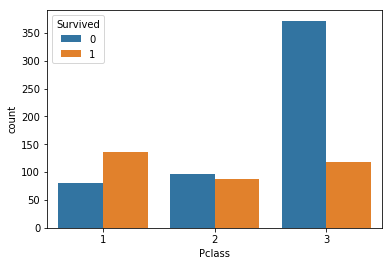

In [5]:
# survivability and ticket class
sns.countplot(x='Pclass', hue='Survived', data=dat);

From this plot, we see that the more impressive your ticket class, the better chances you had of survival. And yes, more people survived from class 3 than from class 2, but this is probably due to the fact that there were so many more passengers in class 3. It's clear that the percentage of survivors is higher in class 2 than class 3.

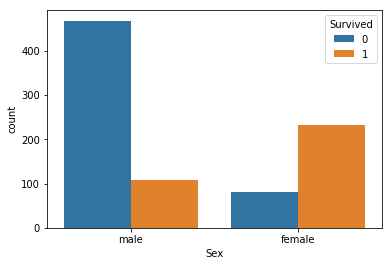

In [6]:
# what about gender and survivability?
sns.countplot(x='Sex', hue='Survived', data=dat);

Being female clearly looks better here!!

In [7]:
# And age? Let's show the distribution of age of those who survived.
survivors = dat[dat['Survived'] == 1]

In [8]:
# Drop missing values and convert to integers
survivors['Age'] = pd.to_numeric(survivors['Age'], errors='coerce')
survivors = survivors.dropna(subset=['Age'])
survivors['Age'] = survivors['Age'].astype(int)

/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


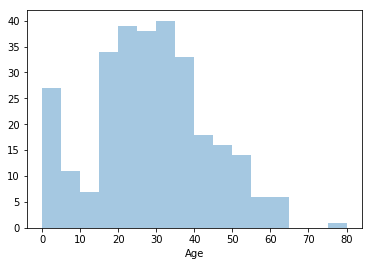

In [9]:
sns.distplot(survivors['Age'], kde=False);

This distribution is bimodal and skewed right. This implies being younger was better for your chances of survival. The lack of survivals is interesting for the ages between about 5 and 15, maybe we see a spike in deaths for that group? Let's check:

/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


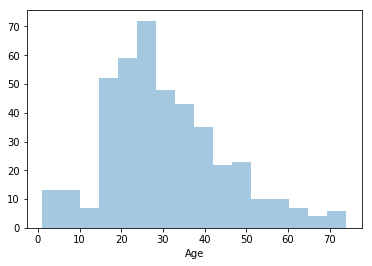

In [10]:
# Checking age distribution for non-survivors
non_survivors = dat[dat['Survived'] == 0]
non_survivors['Age'] = pd.to_numeric(non_survivors['Age'], errors='coerce')
non_survivors = non_survivors.dropna(subset=['Age'])
non_survivors['Age'] = non_survivors['Age'].astype(int)
sns.distplot(non_survivors['Age'], kde=False);

We don't see this spike. Perhaps the missing vals in age correspond to the 5-15 age group. Or, perhaps there weren't that many of them on the ship.

In [11]:
# re-examine data
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


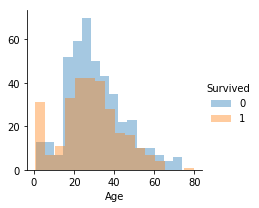

In [12]:
# Let's put them on top of each other to see if we see anything else interesting...
p = sns.FacetGrid(dat, hue='Survived')
p = p.map(sns.distplot, 'Age', kde=False).add_legend()

Really, the most notable difference is the spike in survivals of very young children, seemingly in the 0-5 range. Otherwise, the histograms are consistent with each other.

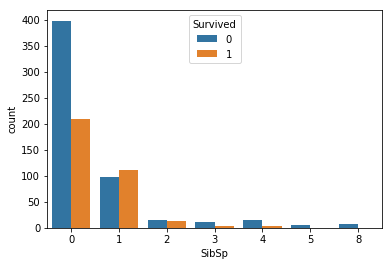

In [13]:
# We've seen sex, age, and ticket class, but what about family relations? For this we'll have to look at the
# SibSp and Parch columns.
sns.countplot(x='SibSp', hue='Survived', data=dat);

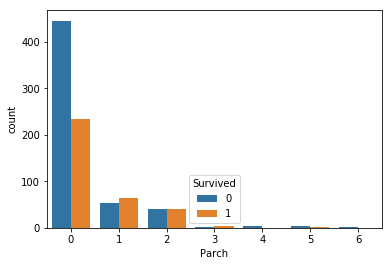

In [14]:
sns.countplot(x='Parch', hue='Survived', data=dat);

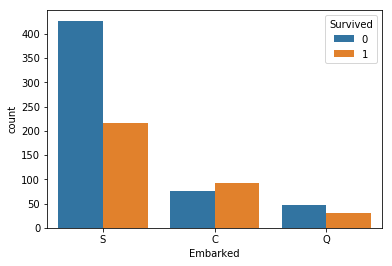

In [15]:
# Place of embarkment... could be something here
sns.countplot(x='Embarked', hue='Survived', data=dat);

In [16]:
dat['Cabin'].isna().sum()
# Since there are so many missing vals, I might just throw this column out...

687

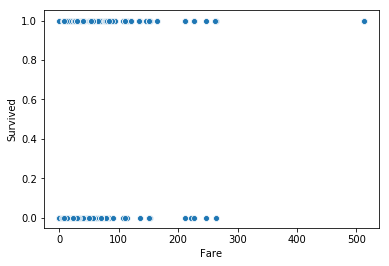

In [17]:
sns.scatterplot(x='Fare', y='Survived', data=dat, y_jitter=0.2);

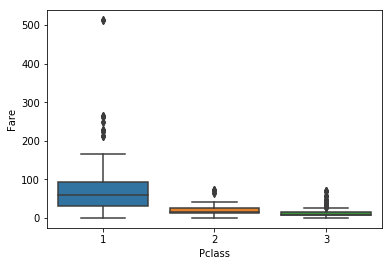

In [18]:
# Is fare related to ticket class?
sns.boxplot(x='Pclass', y='Fare', data=dat);
# I think I'll exclude Fare for now...

## Modeling

In [19]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.model_selection import train_test_split

# Remove response variable from our data
X = dat
y = X['Survived']
X = X.drop('Survived', axis=1)
X = X[['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch']]

# Make train and validation split
#X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=9)

In [21]:
# Transform and model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Age']),
        ('cat', categorical_transformer, ['Sex', 'Embarked'])
    ])

my_piper = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=9)),
])

In [22]:
X.head()

,Pclass,Sex,Age,Embarked,SibSp,Parch
0,3,male,22.0,S,1,0
1,1,female,38.0,C,1,0
2,3,female,26.0,S,0,0
3,1,female,35.0,S,1,0
4,3,male,35.0,S,0,0


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_piper, X, y, cv=5)

print(scores)
print('average score: {}'.format(scores.mean()))

[0.80446927 0.80446927 0.78651685 0.75280899 0.78531073]
average score: 0.7867150249291879


/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

An average score of close to 79% seems pretty good. If we just predict everyone to have died... we would get:

In [24]:
np.count_nonzero(y == 0) / len(y)

0.6161616161616161

And so the model seems to do a good job! Note also we did cross validation due to the fact that our dataset is quite small, and so the cross-validation scores give us a good measure of the accuracy and consistency of the model. (And, it does seems to be consistent). Let's get ready to test it on the test data now.

In [25]:
# Test data
test = pd.read_csv('./test.csv')
X_test = test[['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch']]
X_test.head()

,Pclass,Sex,Age,Embarked,SibSp,Parch
0,3,male,34.5,Q,0,0
1,3,female,47.0,S,1,0
2,2,male,62.0,Q,0,0
3,3,male,27.0,S,0,0
4,3,female,22.0,S,1,1


In [26]:
# model and make predictions
my_piper.fit(X, y)

predictions = pd.DataFrame(
    my_piper.predict_proba(X_test),
    columns=my_piper.classes_)

predictions['PassengerId'] = test['PassengerId']
predictions.head()

/Users/jakesingleton/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1,PassengerId
0,0.856942,0.143058,892
1,0.318299,0.681701,893
2,0.878530,0.121470,894
3,0.829652,0.170348,895
4,0.282331,0.717669,896


These numbers represent the probability of either surviving or not surviving, where surviving corresponds to 1 and not surviving corresponds to 0. For example, the passenger with id 892 has $P(surviving) = 0.143058$.

In [27]:
# create submission of correct form
final_preds = pd.DataFrame(
    my_piper.predict(X_test),
    columns=['Survived'])

final_preds['PassengerId'] = test['PassengerId']

final_preds.head()

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896


In [28]:
# submission file
final_preds.to_csv('submission.csv', index=False)

### What if we try a random forest classifier?

In [29]:
import sklearn.ensemble as ske

rf_piper = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ske.RandomForestClassifier(n_estimators=100)),
])

rf_piper.fit(X, y)

rf_predictions = pd.DataFrame(
    rf_piper.predict_proba(X_test),
    columns=rf_piper.classes_)

rf_predictions['PassengerId'] = test['PassengerId']
rf_predictions.head()

,0,1,PassengerId
0,0.992849,0.007151,892
1,0.535833,0.464167,893
2,0.995000,0.005000,894
3,0.435582,0.564418,895
4,0.204628,0.795372,896


In [30]:
# create submission of correct form
rf_final_preds = pd.DataFrame(
    rf_piper.predict(X_test),
    columns=['Survived'])

rf_final_preds['PassengerId'] = test['PassengerId']

rf_final_preds.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,1,895
4,1,896


In [31]:
rf_final_preds.to_csv('rf_submission.csv', index=False)

In [32]:
merged = pd.merge(final_preds, rf_final_preds, on='PassengerId')

In [33]:
merged.head()

,Survived_x,PassengerId,Survived_y
0,0,892,0
1,1,893,0
2,0,894,0
3,0,895,1
4,1,896,1


In [34]:
merged[merged['Survived_x'] != merged['Survived_y']].shape

(54, 3)